In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('./Data/text_emotion.csv')

#### shows that we have the alot of data which is good

In [4]:
len(df)

40000

I now proceed to display the number of text per sentiment

In [5]:
sentiments = df.groupby('sentiment').agg('size')
sentiments = pd.DataFrame(sentiments)

In [6]:
sentiments = sentiments.rename(columns={0: 'sentiment count'}, inplace=False)

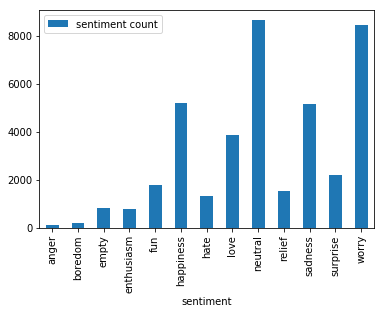

In [7]:
sentiments.plot.bar(rot=90)
plt.show()

## EmotionPhrases.csv
#### I proceed to reading the other dataset containing text with their labeled emotions

In [13]:
messages = pd.read_csv('./Data/EmotionPhrases.csv')
grouped_messages = pd.DataFrame(messages.groupby('Sentiment').agg('size'))
grouped_messages = grouped_messages.rename(columns={0:'sentiment_Count'})

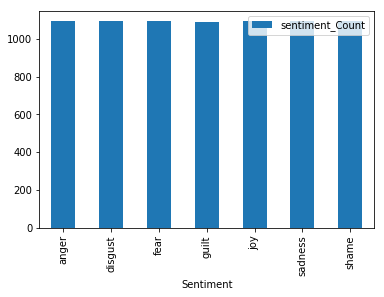

In [14]:
grouped_messages.plot.bar(rot=90)
plt.show()




In [16]:
sentiments_groups = []
for gr,df in messages.groupby('Sentiment'):
    sentiments_groups.append(df)

### I proceed in showing the various tweets per category

1) Anger

In [20]:
sentiments_groups[0].head()

,Sentiment,Content
2,anger,When I had been obviously unjustly treated and...
9,anger,When a car is overtaking another and I am forc...
16,anger,When one is unjustly accused of something one ...
23,anger,Friends who torture animals.
30,anger,When my partner was attacked and lost three te...


2) Disgust

In [21]:
sentiments_groups[1].head()

,Sentiment,Content
4,disgust,At a gathering I found myself involuntarily si...
11,disgust,When I found a bristle in the liver paste tube.
18,disgust,When one finds out that someone you know is no...
25,disgust,Friends who torture animals.
32,disgust,When I nearly walked on a blindworm and then s...


3) Fear

In [24]:
sentiments_groups[2].head()

,Sentiment,Content
1,fear,Every time I imagine that someone I love or I ...
8,fear,"When, for the first time I realized the meanin..."
15,fear,When one has arranged to meet someone and that...
22,fear,When I climbed up a tree to pick apples. The ...
29,fear,When my 2 year old son climbed up and sat on t...


4) Guilt

In [26]:
sentiments_groups[3].head()

,Sentiment,Content
6,guilt,I feel guilty when when I realize that I consi...
13,guilt,When I think that I do not study enough. Afte...
20,guilt,When one has neglected or been unjust to a goo...
27,guilt,[ When excuses are necessary and I get out of ...
34,guilt,I experience a sense of guilt as my middle son...


5) Joy

In [27]:
sentiments_groups[4].head()

,Sentiment,Content
0,joy,[ On days when I feel close to my partner and ...
7,joy,After my girlfriend had taken her exam we went...
14,joy,When I pass an examination which I did not thi...
21,joy,Passing an exam I did not expect to pass.
28,joy,When I had my children.


6) Sadness

In [28]:
sentiments_groups[5].head()

,Sentiment,Content
3,sadness,When I think about the short time that we live...
10,sadness,When I recently thought about the hard work it...
17,sadness,When one's studies seem hopelessly difficult a...
24,sadness,[ Same as in anger.]
31,sadness,When I see children on T.V from areas devastat...


In [29]:
sentiments_groups[6].head()

,Sentiment,Content
5,shame,When I realized that I was directing the feeli...
12,shame,"When I was tired and unmotivated, I shouted at..."
19,shame,"When one has been unjust, stupid towards someo..."
26,shame,[ Same as above - friends who torture animals.]
33,shame,When I saw my 18 year old son grab an oxygen m...
